In [52]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [4]:
def read_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [5]:
def read_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    sorted_fsd = dict(sorted(fsd.items()))
                            
                    res.append(sorted_fsd)
            
    return res

# read_fsd_data()

## Prepare Dataset

In [75]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-125w"]
caida0816 = ["caida0816-600w", "caida0816-300w", "caida0816-150w"]
zipf2a = ["zipf2a-150w", "zipf2a-75w", "zipf2a-35w"]
zipf2b = ["zipf2b-400w", "zipf2b-200w", "zipf2b-100w"]
zipf4 = ["zipf4-60w", "zipf4-30w", "zipf4-15w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-125w_10_.pcap")
pcap_file.append("caida0816-600w_10_.pcap")
pcap_file.append("caida0816-300w_10_.pcap")
pcap_file.append("caida0816-150w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-75w_10_.pcap") 
pcap_file.append("zipf2a-35w_10_.pcap") 
pcap_file.append("zipf2b-400w_10_.pcap") 
pcap_file.append("zipf2b-200w_10_.pcap") 
pcap_file.append("zipf2b-100w_10_.pcap") 

# pcap_file.append("zipf4-60w_10_.pcap")
# pcap_file.append("zipf4-30w_10_.pcap")
# pcap_file.append("zipf4-15w_10_.pcap")


# # # same dist, caida
for a in caida0517:
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# pcap_file.append(f'{caida0816[0]}_{lens[0][0]}_{zipf2a[0]}_{lens[0][1]}.pcap')
            
# # # same dist, zipf
for a in zipf2a:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in zipf2b:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, caida + zipf2a
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, caida + zipf2b
for a in caida0517:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
for a in caida0816:
    for b in zipf2b:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, caida + zipf4
# for a in caida0517:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in caida0816:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # diff dist, zipf2a + caida
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf2b + caida
for a in zipf2b:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
    for b in caida0816:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # diff dist, zipf4 + caida
# for a in zipf4:
#     for b in caida0517:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
#     for b in caida0816:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')

# # # # diff dist, zipf 2a + zipf4
# for a in zipf2a:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2a:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
# # # # diff dist, zipf 2b + zipf4
# for a in zipf2b:
#     for b in zipf4:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
# for a in zipf4:
#     for b in zipf2b:
#         for l in lens:
#             pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
            
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-125w_10_.pcap', 'caida0816-600w_10_.pcap', 'caida0816-300w_10_.pcap', 'caida0816-150w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-75w_10_.pcap', 'zipf2a-35w_10_.pcap', 'zipf2b-400w_10_.pcap', 'zipf2b-200w_10_.pcap', 'zipf2b-100w_10_.pcap', 'caida0517-500w_6_caida0816-600w_4.pcap', 'caida0517-500w_6_caida0816-300w_4.pcap', 'caida0517-500w_6_caida0816-150w_4.pcap', 'caida0517-250w_6_caida0816-600w_4.pcap', 'caida0517-250w_6_caida0816-300w_4.pcap', 'caida0517-250w_6_caida0816-150w_4.pcap', 'caida0517-125w_6_caida0816-600w_4.pcap', 'caida0517-125w_6_caida0816-300w_4.pcap', 'caida0517-125w_6_caida0816-150w_4.pcap', 'caida0816-600w_6_caida0517-500w_4.pcap', 'caida0816-600w_6_caida0517-250w_4.pcap', 'caida0816-600w_6_caida0517-125w_4.pcap', 'caida0816-300w_6_caida0517-500w_4.pcap', 'caida0816-300w_6_caida0517-250w_4.pcap', 'caida0816-300w_6_caida0517-125w_4.pcap', 'caida0816-150w_6_caida0517-500w_4.pcap', 'caida0816-150w_6_caida

### Predict by MRD changes in adjacent timepoint

In [7]:
def prepare_profiler_bins():
    res = {}
    
    profiler_path = "../traffic_generator/fs_dist/"
    profiler_fsd = []
    for file in sorted(os.listdir(profiler_path)):
        profiler_fsd.append(file)
        
    for file in profiler_fsd:
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
                
        # calcualte CDF
        cdf = {}
        culmulative_prob = 0.0
        for fs, freq in sorted(fsd.items()):
            culmulative_prob += (freq/fn)
            cdf[fs] = culmulative_prob
            
        # get bins
        bin = {}
        idx = 0
        for fs, prob in sorted(cdf.items()):
            while idx < round(prob * 100):
                bin[idx] = fs
                idx += 1
                
        res[file[:-4]] = bin
            
    return res
    
# prepare_profiler_bins()

In [8]:
def get_quantized_mapping(fsd, bins):
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bins[idx]:
            if idx < len(bins) - 1:
                idx += 1
            else:
                break
            
        if bins[idx] in qfsd.keys():
            qfsd[bins[idx]] += freq
        else:
            qfsd[bins[idx]] = freq
            
        
    return qfsd

In [9]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    if typ == "MRD":
        plt.ylabel('MRD')
    else:
        plt.ylabel('Value')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [10]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (4+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [74]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

    # MRD_nom = 0
    # MRD_denom = 0
    # for key in fsd1.keys():
    #     true = fsd1[key]
    #     if key in fsd2.keys():
    #         est = fsd2[key]
    #     else:
    #         est = 0
            
    #     MRD_nom += abs(true - est)
    #     MRD_denom += float(true + est)/2
    # MRD = MRD_nom/MRD_denom
    
    # return MRD

In [77]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
            for i in range(1, len(fsd_total)):
                res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [78]:
predict(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

0
caida0517-500w_10__4096
	FSD MRD 
		 [None, None, None, None, 0.25746182618261826, 0.018453114360104106, 0.031325554458109583, 0.012120485006434534, 0.0014320695922362958, 0.009037738551011254, 0.013569904586098802, 0.010799999999999976, 0.01107523640784086, 0.03240000000000004, 0.029630815407703848, 0.01913118623724741, 0.010237823782378253, 0.029768569975621273, 0.023362176217621766, 0.013679479634300717, 0.012166273254650917, 0.020171074214842932, 0.01759999999999995, 0.011357166922933537, 0.003200000000000036, 0.0066464337972104715, 0.009536331940855569, 0.006801951041273402, 0.029697049704970557, 0.026400000000000035, 0.009501590159015916, 0.005599999999999994, 0.01740373149848745, 0.004457067957471084, 0.0035556266880064635, 0.009854185418541772, 0.011856065606560606, 0.002512131213121327, 0.012181828488001423, 0.02839999999999998, 0.010874237118559282, 0.012114102820564132, 0.0, 0.002000400080016007, 0.00937259451890382, 0.023486297259451838, 0.015316503300660145, 0.0133210642

### Predict by MRD changes (from profiler) in adjacent timepoint

In [14]:
def get_profiler_fsd():
    # get profiler dist
    profiler_fsd = {}
    profiler_path = "../traffic_generator/fs_dist/"
    for file in sorted(os.listdir(profiler_path)):
        # print(file)
        path = os.path.join(profiler_path, file)
        
        # Read file to get profilers' flow size distribution
        fsd = {}
        fn = 0
        with open(path, 'r') as f:
            for line in f:
                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                fn += int(line.strip().split()[1])
    
        profiler_fsd[file[:-4]] = fsd
        
    return profiler_fsd

In [15]:
def find_distribution(unknown_fsd):
    # get profiler dist
    profiler_fsd = get_profiler_fsd()
        
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        mrd = calculate_mrd(dist, unknown_fsd)
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    # for name, dist in profiler_fsd.items():
    #     mrd = calculate_mrd(dist, unknown_fsd)
    #     all_mrd[name] = mrd
    #     if mrd < min_mrd:
    #         min_mrd = mrd
    #         predict_dist = name
           
    print(all_mrd)
    print(predict_dist)       
            
    return predict_dist, profiler_fsd[predict_dist]
    

In [ ]:
# calculate jsd
import numpy as np
from scipy.spatial.distance import jensenshannon

def calculate_jsd(fsd1, fsd2):
    
    # Convert dictionaries to arrays for easier manipulation
    keys = sorted(set(fsd1.keys()) | set(fsd2.keys()))
    flow_sizes = np.array(keys)
    freq1 = np.array([fsd1.get(flow_size, 0) for flow_size in keys])
    freq2 = np.array([fsd2.get(flow_size, 0) for flow_size in keys])

    # Calculate probability distributions
    prob_distribution1 = freq1 / np.sum(freq1)
    prob_distribution2 = freq2 / np.sum(freq2)

    # Calculate Jensen-Shannon divergence
    js_distance = jensenshannon(prob_distribution1, prob_distribution2)

    # print("Jensen-Shannon Divergence:", js_distance)
    return  js_distance

In [16]:
def predict_by_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
            # for i in range(1, len(fsd_total)):
            #     res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                
            # # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            # for i in range(3, len(res_mrd[name])):
            #     res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            # for i in range(4, len(res_mrd_var[name])):
            #     res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    # # find dist
    # for i in range(len(label)):
    #     target_dist = []
    #     print(label[i])
    #     for j in range(int(1000/window_size)):
    #         dist_name, dist = find_distribution(res_fsd[label[i]][4+j])
    #         print(dist_name)
    #     print("---\n")
        
    profiler_fsd = get_profiler_fsd()
    
    for i in range(len(label)):
        
        # get profiler fsd
        target_fsd = profiler_fsd[label[i].split("_")[0]]
        print("profiler: ", label[i].split("_")[0])
        
        # calculate mrd
        for j in range(0, len(res_fsd[label[i]])):
            res_mrd[label[i]].append(calculate_mrd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
            # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')

        for j in range(2, len(res_mrd[label[i]])):
            res_mrd_var[label[i]].append(abs(res_mrd[label[i]][j] - res_mrd[label[i]][j-1]))  
            
        for j in range(3, len(res_mrd_var[label[i]])):
            res_mrd_sec_var[label[i]].append(abs(res_mrd_var[label[i]][j] - res_mrd_var[label[i]][j-1]))
            
        # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')
        # plot_mrd_variation(res_mrd_sec_var[label[i]], label[i], window_size, 'Sec Var')
        
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][3:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_mrd_sec_var[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' FSD predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    

In [ ]:
predict_by_dist(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

profiler:  zipf2b-400w
0
zipf2b-400w_6_caida0517-500w_4_4096
	FSD MRD 
		 [None, None, None, 2.6901077446073174e-05, 0.00010971072793308778, 0.0016152415060421976, 0.0011084464302211217, 0.0016023679679064706, 0.0010834296849977498, 0.0003003869322124597, 0.00045199785440686036, 0.00039487481649791434, 0.0015976621501618826, 0.0007094826116604835, 0.0005062979045931115, 0.0004911599586319149, 9.447961578312736e-05, 0.0006024705603728808, 0.00045190082771107143, 0.0006835446824797753, 0.0015989460647771736, 0.001408111414519908, 0.0013541170403035263, 0.001092188200823907, 0.0011741696340439312, 0.001150132951859728, 0.00030322216184952566, 0.0005747736682208959, 0.0009052306004704302, 0.0010255921372299692, 0.0007500241710993727, 0.0006983552794936898, 0.0014360835179798581, 4.03571913480949e-05, 0.0010361514441508124, 0.00042162349000696153, 0.00028544379830375277, 0.0010344764126286599, 0.0012142713041742859, 0.0001941237839420129, 0.0005769536443864798, 0.0006036396516739817, 0.0001

In [17]:
def predict_distribution(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20):
    
    # top 10000
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None] 
            res_mrd_var[name] = [None, None]
            res_mrd_sec_var[name] = [None, None, None]
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    # find dist
    for i in range(len(label)):
        target_dist = []
        print(label[i])
        for j in range(int(1000/window_size)):
            dist_name, dist = find_distribution(res_fsd[label[i]][4+j])
            # print(dist_name)
        print("---\n")
        
    # profiler_fsd = get_profiler_fsd()
    
    # for i in range(len(label)):
        
    #     # get profiler fsd
    #     target_fsd = profiler_fsd[label[i].split("_")[0]]
    #     print("profiler: ", label[i].split("_")[0])
        
    #     # calculate mrd
    #     for j in range(0, len(res_fsd[label[i]])):
    #         res_mrd[label[i]].append(calculate_mrd(target_fsd, res_fsd[label[i]][j]))
    #         # res_mrd[label[i]].append(calculate_jsd(target_fsd, res_fsd[label[i]][j]))
    #         # res_mrd[label[i]].append(calculate_mrd(res_fsd[label[i]][j], target_fsd))
    #     # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')

    #     for j in range(2, len(res_mrd[label[i]])):
    #         res_mrd_var[label[i]].append(abs(res_mrd[label[i]][j] - res_mrd[label[i]][j-1]))  
            
    #     for j in range(3, len(res_mrd_var[label[i]])):
    #         res_mrd_sec_var[label[i]].append(abs(res_mrd_var[label[i]][j] - res_mrd_var[label[i]][j-1]))
            
    #     # plot_mrd_variation(res_mrd[label[i]], label[i], window_size, 'MRD')
    #     # plot_mrd_variation(res_mrd_sec_var[label[i]], label[i], window_size, 'Sec Var')
        
    #     sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][3:], dev, ws)
        
    #     pred.append(time_sec_var)
           
    #     print(i)
    #     print(label[i])
    #     print('\tFSD MRD ')
    #     # print('\t\t', var_max3, var_avg3, var_diff3)
    #     # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
    #     print('\t\t', res_mrd_sec_var[label[i]])
    #     print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
    #     print(f'\t\t{val}, max time: {max_time}')
    #     print()
        
    #     if answer[i] == 10:
    #         if sec_var_hit == 0:
    #             hit.append(1)
    #         else:
    #             hit.append(0)
    #     else:
    #         if sec_var_hit == 1:
    #             hit.append(1)
    #         else:
    #             hit.append(0)
            
        

    # succ = 0

    # for i in range(len(label)):
    #     if hit[i] == 1:
    #         if answer[i] == 10:
    #             succ += 1
    #         else:
    #             if abs(pred[i] - answer[i]) <= 1.0:
    #                 succ += 1
    
    # print("single comprehensive predict")
    # print(f' FSD predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    # print()
    
    

In [ ]:
predict_distribution(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

caida0517-500w_10__4096
{'caida0517-125w': 1.3796000250767977, 'caida0517-250w': 1.661371706223136, 'caida0517-500w': 1.8229633243159342, 'caida0816-150w': 1.4043166331462191, 'caida0816-300w': 1.6767309875141885, 'caida0816-600w': 1.8312367467283956, 'zipf2a-150w': 1.7738507317665635, 'zipf2a-35w': 1.564102564102564, 'zipf2a-75w': 1.667996880877024, 'zipf2b-100w': 1.7825798132155837, 'zipf2b-200w': 1.8676140110074952, 'zipf2b-400w': 1.9317673301538862, 'zipf4-15w': 1.9396009954025897, 'zipf4-30w': 1.9527980782489422, 'zipf4-60w': 1.9627424124398698}
caida0517-125w
{'caida0517-125w': 1.3859847060298358, 'caida0517-250w': 1.6615076196462852, 'caida0517-500w': 1.8228955094148847, 'caida0816-150w': 1.4083280794980335, 'caida0816-300w': 1.6766818542960453, 'caida0816-600w': 1.8313338515089048, 'zipf2a-150w': 1.7883230296478934, 'zipf2a-35w': 1.6004807493058146, 'zipf2a-75w': 1.6966720220335092, 'zipf2b-100w': 1.799273068355024, 'zipf2b-200w': 1.869661167478537, 'zipf2b-400w': 1.93183528799

caida0517-125w 810


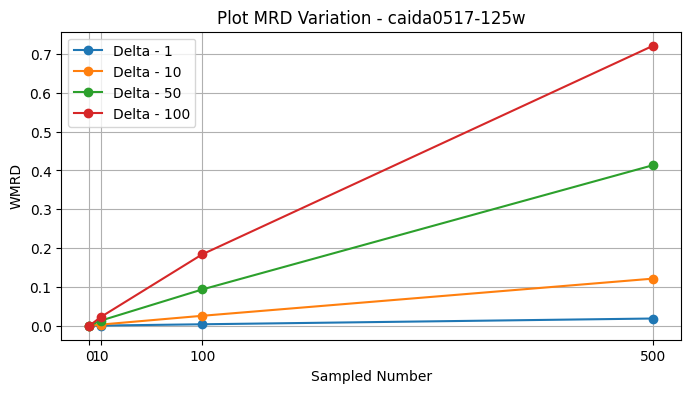

---
caida0517-250w 1156


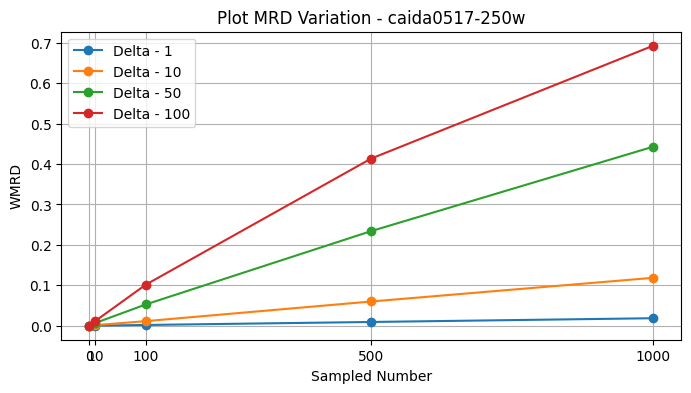

---
caida0517-500w 1653


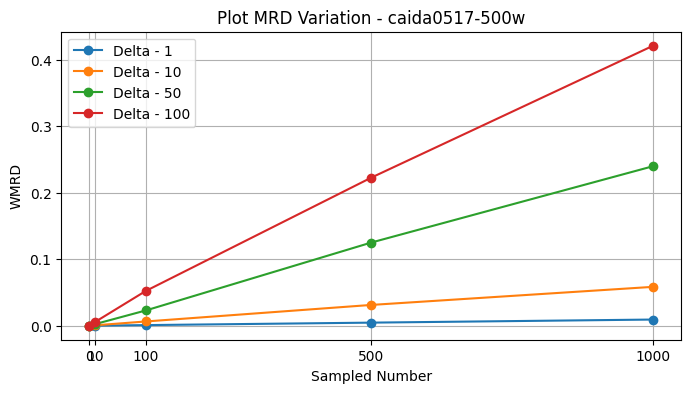

---
caida0816-150w 905


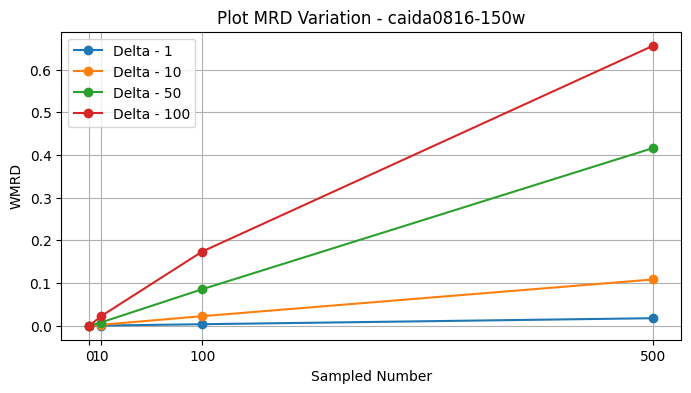

---
caida0816-300w 1273


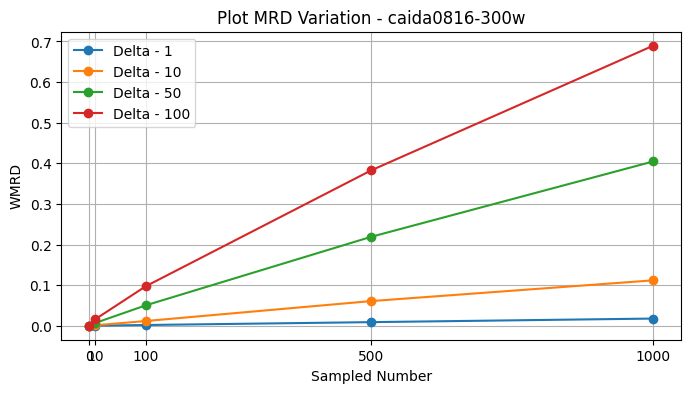

---
caida0816-600w 1835


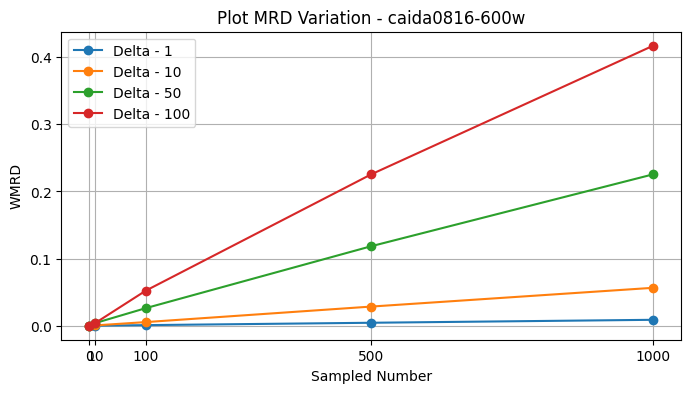

---
zipf2a-150w 761


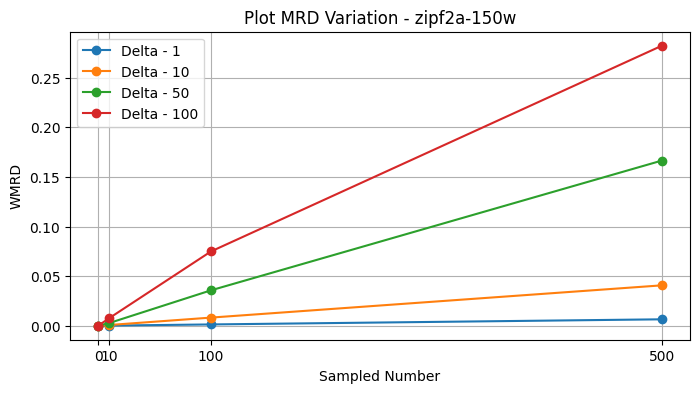

---
zipf2a-35w 323


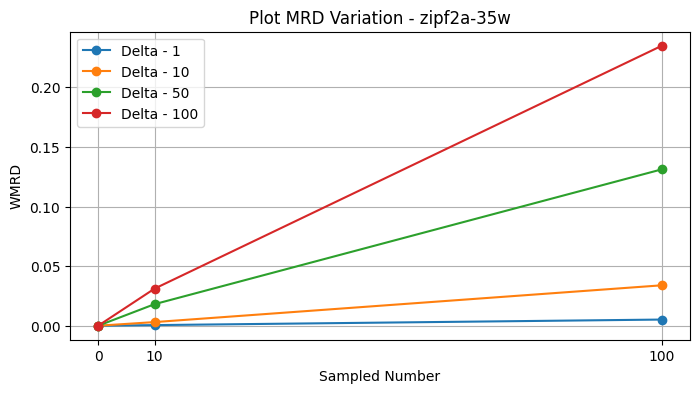

---
zipf2a-75w 494


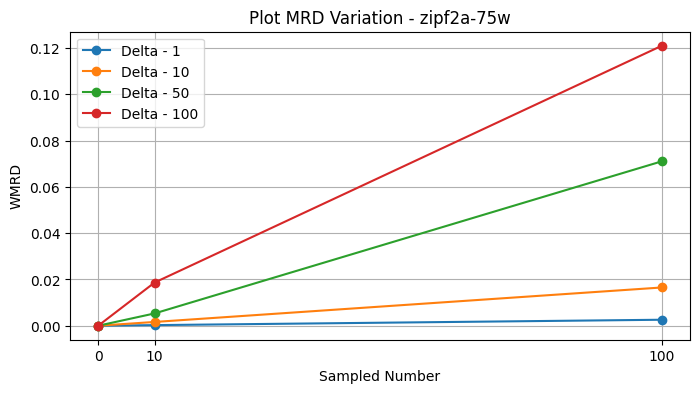

---
zipf2b-100w 608


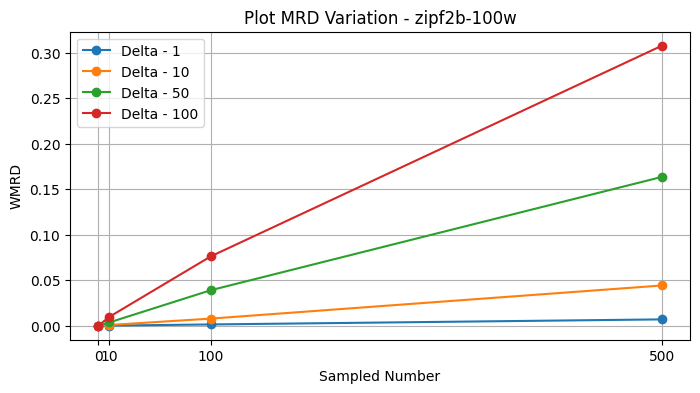

---
zipf2b-200w 912


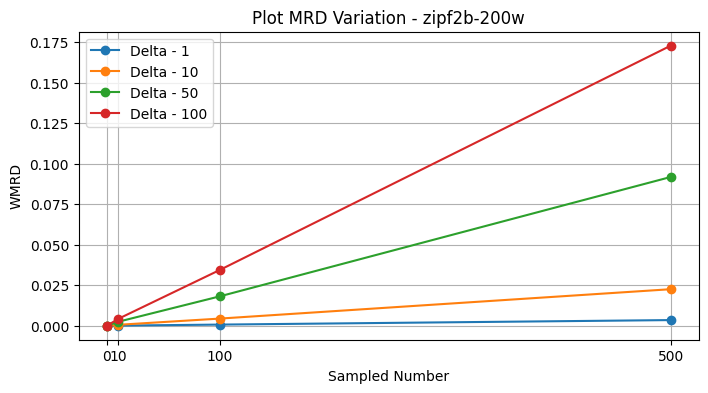

---
zipf2b-400w 1391


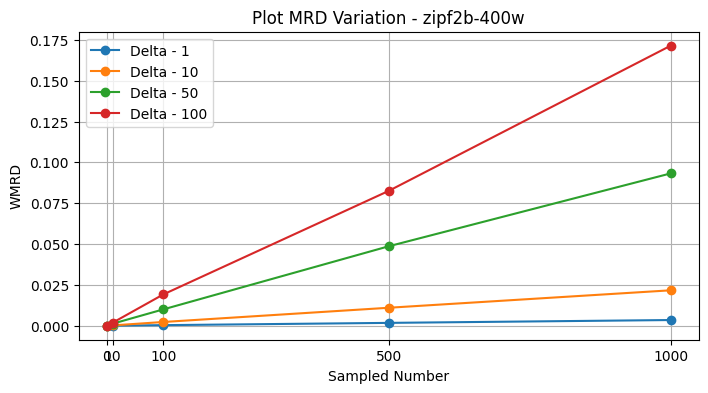

---
zipf4-15w 178


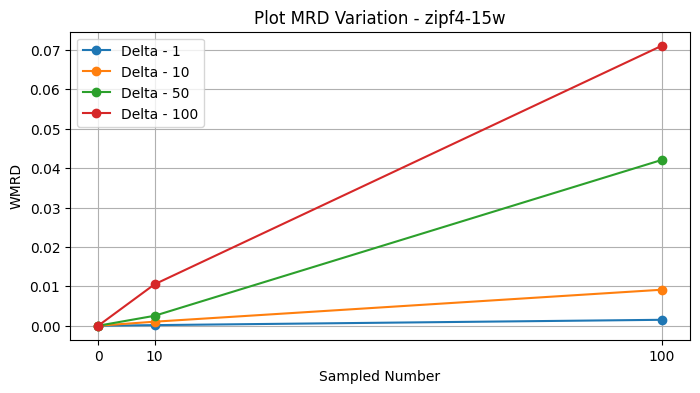

---
zipf4-30w 260


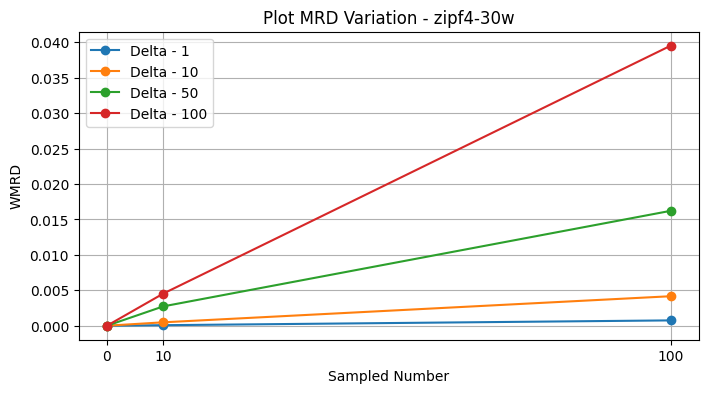

---
zipf4-60w 394


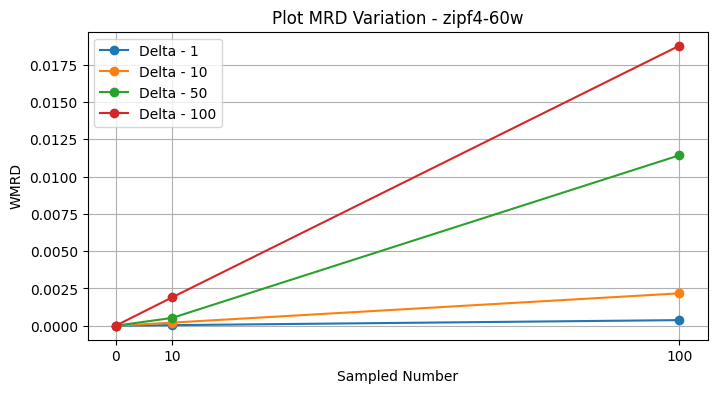

---


In [73]:
## test WMRD work
def cal_mrd(fsd1, fsd2):
    
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD
 
def plot(mrd_var, name):
    plt.figure(figsize=(8, 4))
    # Plot each data point
    for delta, data_dict in mrd_var.items():
        x = list(data_dict.keys())
        y = list(data_dict.values())
        plt.plot(x, y, marker='o', linestyle='-', label=f'Delta - {delta}')

    # Customize the plot
    plt.xlabel('Sampled Number')
    plt.ylabel('WMRD')
    plt.xticks(list(mrd_var[next(iter(mrd_var))].keys()))
    plt.title('Plot MRD Variation - %s' % (name))
    plt.grid(True)
    plt.legend()
    plt.show()
    
    
    
profiler_fsd = get_profiler_fsd()
sample_list = [10, 100, 500, 1000, 5000]
# sample_list = [500]
delta = [1, 10, 50, 100]
for key in profiler_fsd.keys():
    print(key, len(profiler_fsd[key].keys()))
    
    mrd_var = {}
    for d in delta:
        changed_profiler_fsd = {}
        # changed_profiler_fsd[0] = profiler_fsd[key]
        for ss in sample_list:
            fsd = copy.deepcopy(profiler_fsd[key])
            # print(ss, len(fsd.keys()))
            if ss > len(fsd.keys()):
                break
            key_list = list(profiler_fsd[key].keys())
            random.shuffle(key_list)
            for i in range(ss):
                if random.randint(1,2) == 1: 
                    fsd[key_list[i]] = max(0, fsd[key_list[i]]-d)
                else:
                    fsd[key_list[i]] += d
                    
            changed_profiler_fsd[ss] = dict(sorted(fsd.items()))
            
        # for item in changed_profiler_fsd.items():
        #     print(item)
        mrds = {}
        mrds[0] = cal_mrd(profiler_fsd[key], profiler_fsd[key])
        for ss, val in changed_profiler_fsd.items():
            mrds[ss] = cal_mrd(profiler_fsd[key], val)
            
        mrd_var[d] = mrds
        
    # print(mrd_var)
    plot(mrd_var, key)
    print("---")
    
